### SetUp

In [6]:
import os
from pathlib import Path

import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
project_path = Path(Path.cwd()).parent.parent
project_path

WindowsPath('c:/Users/jrafa/Desktop/9. Universidad/Sistemas Inteligentes/Proyecto/code')

In [8]:
SEED = 7777

### Load Data

In [9]:
cancer_detection_path = project_path / "data/inputs/Lung Cancer Dataset.csv"
df_detection = pd.read_csv(cancer_detection_path)

df_detection.columns = [x for x in df_detection.columns.str.lower().str.replace(" ", "_")]

df_detection.head(10)

,age,gender,smoking,finger_discoloration,mental_stress,exposure_to_pollution,long_term_illness,energy_level,immune_weakness,breathing_issue,alcohol_consumption,throat_discomfort,oxygen_saturation,chest_tightness,family_history,smoking_family_history,stress_immune,pulmonary_disease
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
5,37,1,1,1,1,1,1,57.684285,0,1,1,1,94.057151,1,0,0,0,YES
6,50,0,1,1,1,0,1,52.647022,1,1,1,0,96.773598,0,0,0,1,NO
7,68,0,1,1,1,0,1,53.306451,0,0,0,1,95.019018,0,0,0,0,NO
8,48,0,1,1,0,1,1,64.272789,1,1,0,1,98.539379,1,0,0,0,YES
9,52,0,0,0,1,1,1,58.319319,0,1,0,1,96.055097,0,0,0,0,NO


In [10]:
df_detection.shape

(5000, 18)

### Preprocess Data

In [11]:
# Convert label column to numerical values
label_map_dict = {
    'NO': 0,
    'YES': 1
}

df_detection['pulmonary_disease'] = df_detection['pulmonary_disease'].map(label_map_dict)

In [12]:
# Convert binary columns to categorical
binary_columns = [
    'gender',
    'smoking',
    'finger_discoloration',
    'mental_stress',
    'exposure_to_pollution',
    'long_term_illness',
    'immune_weakness',
    'breathing_issue',
    'alcohol_consumption',
    'throat_discomfort',
    'chest_tightness',
    'family_history',
    'smoking_family_history',
    'stress_immune',
    'pulmonary_disease'
]

df_detection[binary_columns] = df_detection[binary_columns].astype('category')

In [13]:
X = df_detection.drop(columns=['pulmonary_disease']).values
y = df_detection['pulmonary_disease'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=SEED, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=SEED, stratify=y_train)

In [14]:
X_train.mean(axis=0), X_train.std(axis=0)

(array([57.37015504,  0.49612403,  0.66196013,  0.60354374,  0.54512735,
         0.51522702,  0.43992248, 54.99256295,  0.39451827,  0.79983389,
         0.35022148,  0.69988926, 94.9913959 ,  0.6013289 ,  0.303433  ,
         0.20265781,  0.21179402]),
 array([15.83079571,  0.49998498,  0.47304219,  0.48916121,  0.49795936,
         0.49976808,  0.49637757,  7.84740972,  0.48874697,  0.40012453,
         0.4770392 ,  0.45830589,  1.49321387,  0.48962481,  0.4597406 ,
         0.40197963,  0.40857963]))

In [15]:
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (3612, 17)
Validation set shape: (638, 17)
Test set shape: (750, 17)


In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
X_train.mean(axis=0), X_train.std(axis=0)

(array([-9.36712256e-17,  5.58799961e-16,  2.21921657e-17,  9.18731069e-16,
         3.39583167e-16, -3.29501407e-16, -3.01223301e-18,  6.65107197e-15,
        -5.77365152e-16, -2.30528037e-18, -2.22474924e-16,  1.03645405e-16,
         8.44649655e-14, -1.71082540e-16,  2.00467181e-16,  4.21036406e-16,
        -5.33165243e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

### Modeling 2

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Sequential, Linear, ReLU, LeakyReLU, Sigmoid, Dropout
import torch.nn as nn
import torch
from train import _compute_metrics, train_epoch, eval_epoch

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

mlp = Sequential(
    Linear(17, 64),
    ReLU(),
    Dropout(0.3),
    Linear(64, 32),
    ReLU(),
    Dropout(0.3),
    Linear(32, 16),
    ReLU(),
    Dropout(0.1),
    Linear(16, 2)
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.0008, weight_decay=1e-4)

device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, pin_memory=True)

# Training loop
epochs = 500
mlp.to(device)

# Early stopping variables
best_val_loss = float('inf')
patience = 100
patience_counter = 0
best_epoch = 0

# History tracking
history_loss_train = []
history_loss_val = []

# Best model metrics storage
best_train_metrics = {}
best_val_metrics = {}

for epoch in range(epochs):
    train_loss, train_acc, train_labels, train_preds, train_probs = train_epoch(mlp, train_loader, criterion, optimizer, device)
    val_loss, val_acc, val_labels, val_preds, val_probs = eval_epoch(mlp, val_loader, criterion, device)
    
    # Store loss history
    history_loss_train.append(train_loss)
    history_loss_val.append(val_loss)
    
    # Compute detailed metrics
    train_precision, train_recall, train_f1, train_auroc = _compute_metrics(train_labels, train_preds, train_probs)
    val_precision, val_recall, val_f1, val_auroc = _compute_metrics(val_labels, val_preds, val_probs)
    
    # Print metrics every 10 epochs or at the end
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:3d}/{epochs} | Train: Loss {train_loss:.4f} Acc {train_acc:.2f}% F1 {train_f1:.4f} AUROC {train_auroc:.4f} | Val: Loss {val_loss:.4f} Acc {val_acc:.2f}% F1 {val_f1:.4f} AUROC {val_auroc:.4f}")
    
    # Early stopping and best model tracking
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch + 1
        patience_counter = 0
        
        # Save best model
        torch.save(mlp.state_dict(), 'best_model.pth')
        
        # Store best model metrics
        best_train_metrics = {
            'loss': train_loss,
            'accuracy': train_acc,
            'precision': train_precision,
            'recall': train_recall,
            'f1': train_f1,
            'auroc': train_auroc
        }
        
        best_val_metrics = {
            'loss': val_loss,
            'accuracy': val_acc,
            'precision': val_precision,
            'recall': val_recall,
            'f1': val_f1,
            'auroc': val_auroc
        }
        
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Print best model performance during training/validation
print(f"\n{'='*80}")
print(f"BEST MODEL PERFORMANCE (Epoch {best_epoch}):")
print(f"{'='*80}")
print(f"Training   - Loss: {best_train_metrics['loss']:.4f}, Acc: {best_train_metrics['accuracy']:.2f}%, "
      f"Precision: {best_train_metrics['precision']:.4f}, Recall: {best_train_metrics['recall']:.4f}, "
      f"F1: {best_train_metrics['f1']:.4f}, AUROC: {best_train_metrics['auroc']:.4f}")
print(f"Validation - Loss: {best_val_metrics['loss']:.4f}, Acc: {best_val_metrics['accuracy']:.2f}%, "
      f"Precision: {best_val_metrics['precision']:.4f}, Recall: {best_val_metrics['recall']:.4f}, "
      f"F1: {best_val_metrics['f1']:.4f}, AUROC: {best_val_metrics['auroc']:.4f}")

# Load best model and evaluate on test set
mlp.load_state_dict(torch.load('best_model.pth'))
test_loss, test_acc, test_labels, test_preds, test_probs = eval_epoch(mlp, test_loader, criterion, device)
test_precision, test_recall, test_f1, test_auroc = _compute_metrics(test_labels, test_preds, test_probs)

print(f"\nTEST SET RESULTS (using best model):")
print(f"Loss: {test_loss:.4f}, Acc: {test_acc:.2f}%, Precision: {test_precision:.4f}, "
      f"Recall: {test_recall:.4f}, F1: {test_f1:.4f}, AUROC: {test_auroc:.4f}")


Epoch   1/500 | Train: Loss 0.6522 Acc 59.33% F1 0.0027 AUROC 0.7066 | Val: Loss 0.5911 Acc 59.25% F1 0.0000 AUROC 0.8809
Epoch  10/500 | Train: Loss 0.3313 Acc 89.37% F1 0.8687 AUROC 0.9227 | Val: Loss 0.2737 Acc 91.54% F1 0.8933 AUROC 0.9427
Epoch  20/500 | Train: Loss 0.3129 Acc 90.14% F1 0.8787 AUROC 0.9261 | Val: Loss 0.2557 Acc 92.01% F1 0.9029 AUROC 0.9435
Epoch  30/500 | Train: Loss 0.2937 Acc 90.97% F1 0.8887 AUROC 0.9308 | Val: Loss 0.2464 Acc 92.48% F1 0.9080 AUROC 0.9455
Epoch  40/500 | Train: Loss 0.2801 Acc 91.22% F1 0.8922 AUROC 0.9369 | Val: Loss 0.2427 Acc 92.48% F1 0.9080 AUROC 0.9449
Epoch  50/500 | Train: Loss 0.2772 Acc 91.17% F1 0.8909 AUROC 0.9381 | Val: Loss 0.2460 Acc 92.32% F1 0.9067 AUROC 0.9449
Epoch  60/500 | Train: Loss 0.2755 Acc 91.11% F1 0.8905 AUROC 0.9411 | Val: Loss 0.2451 Acc 92.48% F1 0.9073 AUROC 0.9449
Epoch  70/500 | Train: Loss 0.2691 Acc 91.17% F1 0.8915 AUROC 0.9449 | Val: Loss 0.2462 Acc 92.16% F1 0.9031 AUROC 0.9447
Epoch  80/500 | Train: L

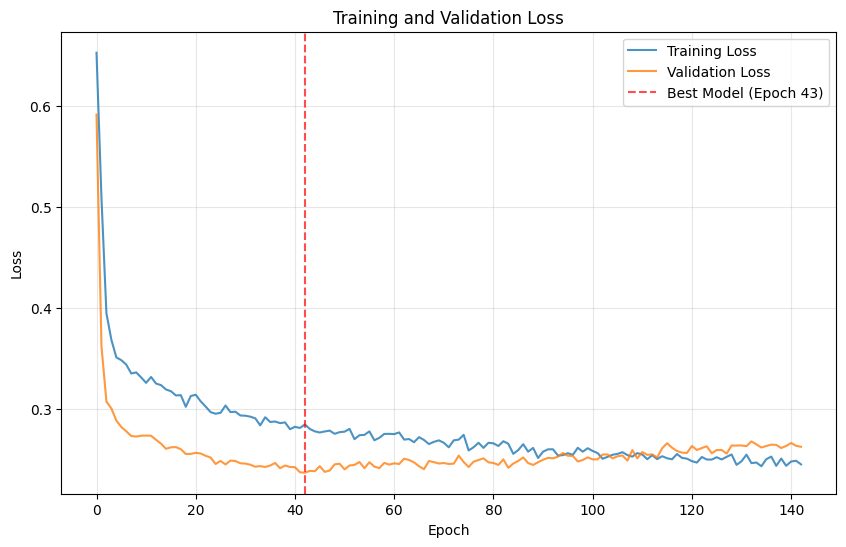

In [40]:
# Example of how to plot loss history (optional)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_loss_train, label='Training Loss', alpha=0.8)
plt.plot(history_loss_val, label='Validation Loss', alpha=0.8)
plt.axvline(x=best_epoch-1, color='red', linestyle='--', alpha=0.7, label=f'Best Model (Epoch {best_epoch})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Modeling 3

Epoch   1/500 | Train: Loss 0.6324 Acc 64.26% F1 0.2533 AUROC 0.7600 | Val: Loss 0.5199 Acc 76.80% F1 0.6224 AUROC 0.9213
Epoch  10/500 | Train: Loss 0.3273 Acc 89.23% F1 0.8681 AUROC 0.9236 | Val: Loss 0.2690 Acc 91.54% F1 0.8973 AUROC 0.9434
Epoch  20/500 | Train: Loss 0.3073 Acc 90.23% F1 0.8799 AUROC 0.9310 | Val: Loss 0.2568 Acc 92.01% F1 0.9032 AUROC 0.9439
Epoch  30/500 | Train: Loss 0.2896 Acc 90.48% F1 0.8828 AUROC 0.9378 | Val: Loss 0.2504 Acc 91.85% F1 0.9008 AUROC 0.9448
Epoch  40/500 | Train: Loss 0.2801 Acc 91.09% F1 0.8906 AUROC 0.9391 | Val: Loss 0.2481 Acc 91.85% F1 0.9008 AUROC 0.9455
Epoch  50/500 | Train: Loss 0.2776 Acc 91.06% F1 0.8903 AUROC 0.9416 | Val: Loss 0.2512 Acc 92.63% F1 0.9101 AUROC 0.9434
Epoch  60/500 | Train: Loss 0.2710 Acc 91.39% F1 0.8941 AUROC 0.9438 | Val: Loss 0.2490 Acc 92.16% F1 0.9038 AUROC 0.9437
Epoch  70/500 | Train: Loss 0.2670 Acc 91.69% F1 0.8977 AUROC 0.9441 | Val: Loss 0.2501 Acc 92.63% F1 0.9094 AUROC 0.9424
Epoch  80/500 | Train: L

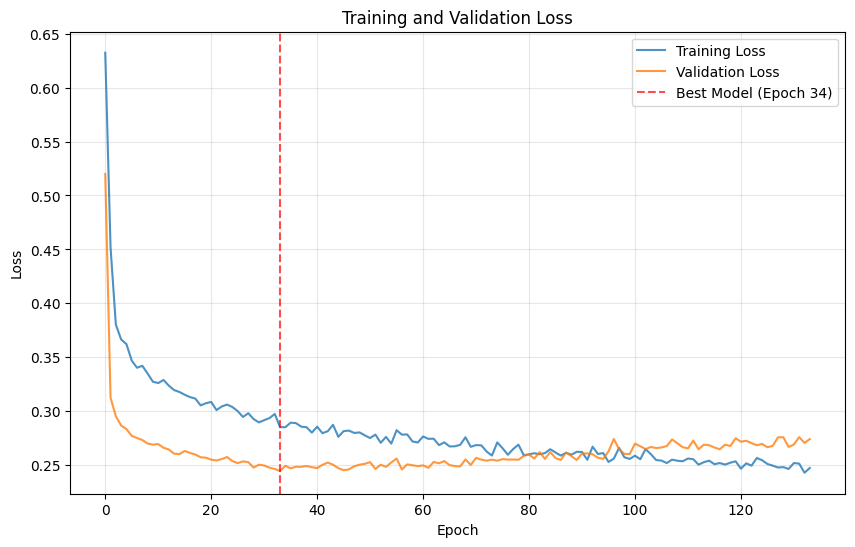

In [14]:
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Sequential, Linear, ReLU, LeakyReLU, Sigmoid, Dropout
import torch.nn as nn
import torch
from train import _compute_metrics, train_epoch, eval_epoch

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

mlp = Sequential(
    Linear(17, 64),
    LeakyReLU(),
    Dropout(0.3),
    Linear(64, 32),
    LeakyReLU(),
    Dropout(0.3),
    Linear(32, 16),
    LeakyReLU(),
    Dropout(0.1),
    Linear(16, 2)
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.0008, weight_decay=1e-4)

device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, pin_memory=True)

# Training loop
epochs = 500
mlp.to(device)

# Early stopping variables
best_val_loss = float('inf')
patience = 100
patience_counter = 0
best_epoch = 0

# History tracking
history_loss_train = []
history_loss_val = []

# Best model metrics storage
best_train_metrics = {}
best_val_metrics = {}

for epoch in range(epochs):
    train_loss, train_acc, train_labels, train_preds, train_probs = train_epoch(mlp, train_loader, criterion, optimizer, device)
    val_loss, val_acc, val_labels, val_preds, val_probs = eval_epoch(mlp, val_loader, criterion, device)
    
    # Store loss history
    history_loss_train.append(train_loss)
    history_loss_val.append(val_loss)
    
    # Compute detailed metrics
    train_precision, train_recall, train_f1, train_auroc = _compute_metrics(train_labels, train_preds, train_probs)
    val_precision, val_recall, val_f1, val_auroc = _compute_metrics(val_labels, val_preds, val_probs)
    
    # Print metrics every 10 epochs or at the end
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:3d}/{epochs} | Train: Loss {train_loss:.4f} Acc {train_acc:.2f}% F1 {train_f1:.4f} AUROC {train_auroc:.4f} | Val: Loss {val_loss:.4f} Acc {val_acc:.2f}% F1 {val_f1:.4f} AUROC {val_auroc:.4f}")
    
    # Early stopping and best model tracking
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch + 1
        patience_counter = 0
        
        # Save best model
        torch.save(mlp.state_dict(), 'best_model.pth')
        
        # Store best model metrics
        best_train_metrics = {
            'loss': train_loss,
            'accuracy': train_acc,
            'precision': train_precision,
            'recall': train_recall,
            'f1': train_f1,
            'auroc': train_auroc
        }
        
        best_val_metrics = {
            'loss': val_loss,
            'accuracy': val_acc,
            'precision': val_precision,
            'recall': val_recall,
            'f1': val_f1,
            'auroc': val_auroc
        }
        
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Print best model performance during training/validation
print(f"\n{'='*80}")
print(f"BEST MODEL PERFORMANCE (Epoch {best_epoch}):")
print(f"{'='*80}")
print(f"Training   - Loss: {best_train_metrics['loss']:.4f}, Acc: {best_train_metrics['accuracy']:.2f}%, "
      f"Precision: {best_train_metrics['precision']:.4f}, Recall: {best_train_metrics['recall']:.4f}, "
      f"F1: {best_train_metrics['f1']:.4f}, AUROC: {best_train_metrics['auroc']:.4f}")
print(f"Validation - Loss: {best_val_metrics['loss']:.4f}, Acc: {best_val_metrics['accuracy']:.2f}%, "
      f"Precision: {best_val_metrics['precision']:.4f}, Recall: {best_val_metrics['recall']:.4f}, "
      f"F1: {best_val_metrics['f1']:.4f}, AUROC: {best_val_metrics['auroc']:.4f}")

# Load best model and evaluate on test set
mlp.load_state_dict(torch.load('best_model.pth'))
test_loss, test_acc, test_labels, test_preds, test_probs = eval_epoch(mlp, test_loader, criterion, device)
test_precision, test_recall, test_f1, test_auroc = _compute_metrics(test_labels, test_preds, test_probs)

print(f"\nTEST SET RESULTS (using best model):")
print(f"Loss: {test_loss:.4f}, Acc: {test_acc:.2f}%, Precision: {test_precision:.4f}, "
      f"Recall: {test_recall:.4f}, F1: {test_f1:.4f}, AUROC: {test_auroc:.4f}")

# Example of how to plot loss history (optional)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_loss_train, label='Training Loss', alpha=0.8)
plt.plot(history_loss_val, label='Validation Loss', alpha=0.8)
plt.axvline(x=best_epoch-1, color='red', linestyle='--', alpha=0.7, label=f'Best Model (Epoch {best_epoch})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Modeling 4

Epoch   1/200 | Train: Loss 0.6763 Acc 58.86% F1 0.0172 AUROC 0.5760 | Val: Loss 0.6569 Acc 59.25% F1 0.0000 AUROC 0.8365
Epoch  10/200 | Train: Loss 0.3370 Acc 88.65% F1 0.8596 AUROC 0.9221 | Val: Loss 0.2824 Acc 91.22% F1 0.8943 AUROC 0.9416
Epoch  20/200 | Train: Loss 0.3186 Acc 89.84% F1 0.8744 AUROC 0.9269 | Val: Loss 0.2664 Acc 91.85% F1 0.9008 AUROC 0.9432
Epoch  30/200 | Train: Loss 0.3027 Acc 90.53% F1 0.8826 AUROC 0.9298 | Val: Loss 0.2575 Acc 91.85% F1 0.9004 AUROC 0.9434
Epoch  40/200 | Train: Loss 0.2916 Acc 90.73% F1 0.8853 AUROC 0.9339 | Val: Loss 0.2495 Acc 92.16% F1 0.9053 AUROC 0.9445
Epoch  50/200 | Train: Loss 0.2816 Acc 90.75% F1 0.8857 AUROC 0.9384 | Val: Loss 0.2424 Acc 92.48% F1 0.9080 AUROC 0.9458
Epoch  60/200 | Train: Loss 0.2790 Acc 91.42% F1 0.8941 AUROC 0.9387 | Val: Loss 0.2405 Acc 92.95% F1 0.9136 AUROC 0.9460
Epoch  70/200 | Train: Loss 0.2787 Acc 91.53% F1 0.8953 AUROC 0.9354 | Val: Loss 0.2383 Acc 93.26% F1 0.9181 AUROC 0.9460
Epoch  80/200 | Train: L

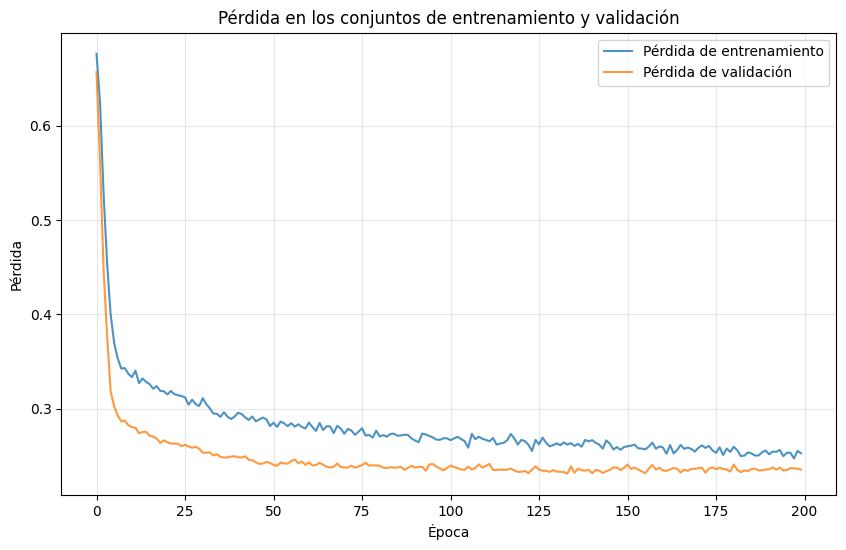

In [40]:
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Sequential, Linear, ReLU, LeakyReLU, Sigmoid, Dropout
import torch.nn as nn
import torch
from train import _compute_metrics, train_epoch, eval_epoch

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

mlp = Sequential(
    Linear(17, 64),
    ReLU(),
    Dropout(0.3),
    Linear(64, 32),
    ReLU(),
    Dropout(0.3),
    Linear(32, 16),
    ReLU(),
    Dropout(0.1),
    Linear(16, 2)
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.0005, weight_decay=1e-3)

device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, pin_memory=True)

# Training loop
epochs = 200
mlp.to(device)

# Early stopping variables
best_val_loss = float('inf')
patience = 300
patience_counter = 0
best_epoch = 0

# History tracking
history_loss_train = []
history_loss_val = []

# Best model metrics storage
best_train_metrics = {}
best_val_metrics = {}

for epoch in range(epochs):
    train_loss, train_acc, train_labels, train_preds, train_probs = train_epoch(mlp, train_loader, criterion, optimizer, device)
    val_loss, val_acc, val_labels, val_preds, val_probs = eval_epoch(mlp, val_loader, criterion, device)
    
    # Store loss history
    history_loss_train.append(train_loss)
    history_loss_val.append(val_loss)
    
    # Compute detailed metrics
    train_precision, train_recall, train_f1, train_auroc = _compute_metrics(train_labels, train_preds, train_probs)
    val_precision, val_recall, val_f1, val_auroc = _compute_metrics(val_labels, val_preds, val_probs)
    
    # Print metrics every 10 epochs or at the end
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:3d}/{epochs} | Train: Loss {train_loss:.4f} Acc {train_acc:.2f}% F1 {train_f1:.4f} AUROC {train_auroc:.4f} | Val: Loss {val_loss:.4f} Acc {val_acc:.2f}% F1 {val_f1:.4f} AUROC {val_auroc:.4f}")
    
    # Early stopping and best model tracking
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch + 1
        patience_counter = 0
        
        # Save best model
        torch.save(mlp.state_dict(), 'best_model.pth')
        
        # Store best model metrics
        best_train_metrics = {
            'loss': train_loss,
            'accuracy': train_acc,
            'precision': train_precision,
            'recall': train_recall,
            'f1': train_f1,
            'auroc': train_auroc
        }
        
        best_val_metrics = {
            'loss': val_loss,
            'accuracy': val_acc,
            'precision': val_precision,
            'recall': val_recall,
            'f1': val_f1,
            'auroc': val_auroc
        }
        
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Print best model performance during training/validation
print(f"\n{'='*80}")
print(f"BEST MODEL PERFORMANCE (Epoch {best_epoch}):")
print(f"{'='*80}")
print(f"Training   - Loss: {best_train_metrics['loss']:.4f}, Acc: {best_train_metrics['accuracy']:.2f}%, "
      f"Precision: {best_train_metrics['precision']:.4f}, Recall: {best_train_metrics['recall']:.4f}, "
      f"F1: {best_train_metrics['f1']:.4f}, AUROC: {best_train_metrics['auroc']:.4f}")
print(f"Validation - Loss: {best_val_metrics['loss']:.4f}, Acc: {best_val_metrics['accuracy']:.2f}%, "
      f"Precision: {best_val_metrics['precision']:.4f}, Recall: {best_val_metrics['recall']:.4f}, "
      f"F1: {best_val_metrics['f1']:.4f}, AUROC: {best_val_metrics['auroc']:.4f}")

# Load best model and evaluate on test set
mlp.load_state_dict(torch.load('best_model.pth'))
test_loss, test_acc, test_labels, test_preds, test_probs = eval_epoch(mlp, test_loader, criterion, device)
test_precision, test_recall, test_f1, test_auroc = _compute_metrics(test_labels, test_preds, test_probs)

print(f"\nTEST SET RESULTS (using best model):")
print(f"Loss: {test_loss:.4f}, Acc: {test_acc:.2f}%, Precision: {test_precision:.4f}, "
      f"Recall: {test_recall:.4f}, F1: {test_f1:.4f}, AUROC: {test_auroc:.4f}")

# Example of how to plot loss history (optional)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_loss_train, label='Pérdida de entrenamiento', alpha=0.8)
plt.plot(history_loss_val, label='Pérdida de validación', alpha=0.8)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida en los conjuntos de entrenamiento y validación')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
